<a href="https://colab.research.google.com/github/eljuanrv/Dragon_Ball_Data-Set/blob/main/Dragon_Ball_Data_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dragon_Ball_Data-Set
---
**Español**

Este archivo consiste en todos los personajes de Dragon Ball, sus Niveles de Poder, la Saga o Pelicula y las Series a las que pertenecen, desde Dragon Ball a Dragon Ball Z: Battle of Gods.

Puedes encontrar el Dataset original en el siguiente enlace 
[Dragon_Ball_Data-Set](https://www.kaggle.com/shiddharthsaran/dragon-ball-dataset)

---
**English**

This file consists of all the Dragon Ball Characters, their Power Levels, the Saga or Movie and Series they are from, from Dragon Ball to Dragon Ball Z: Battle of Gods.

You can find the original Dataset in the following link 
[Dragon_Ball_Data-Set](https://www.kaggle.com/shiddharthsaran/dragon-ball-dataset)

Importamos las librerias más comunes.

- Pandas: Para manipular dataframes
- Numpy: Para manipular vectores facilmente

In [22]:
import pandas as pd
import numpy as np

Cargamos el dataframe y observamos las primeras filas

In [24]:
df=pd.read_csv('https://raw.githubusercontent.com/eljuanrv/Dragon_Ball_Data-Set/main/Dragon_Ball_Data_Set.csv')
df.head()

,Character,Power_Level,Saga_or_Movie,Dragon_Ball_Series
0,Goku,10,Emperor Pilaf Saga,Dragon Ball
1,Bulma,1.5,Emperor Pilaf Saga,Dragon Ball
2,Bear Thief,7,Emperor Pilaf Saga,Dragon Ball
3,Master Roshi,30,Emperor Pilaf Saga,Dragon Ball
4,Oolong,5,Emperor Pilaf Saga,Dragon Ball


Obtenemos la información del df y observamos que:
- Tenemos 4 columnas y todas son tipo object
- La columna **Power_Level** deberia ser numerica para poder realizar operaciones con estos datos

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Character           1244 non-null   object
 1   Power_Level         1244 non-null   object
 2   Saga_or_Movie       1244 non-null   object
 3   Dragon_Ball_Series  1244 non-null   object
dtypes: object(4)
memory usage: 39.0+ KB


## Limpieza

Vamos a convertir la columna **Power_Level** de tipo **object** a **int**

- Al ejecutar la siguiente linea de codigo podmos observar que no podemos convertir a **enteros** porque tenemos valores con **punto decimal (flotantes)**
- Por lo tanto debemos convertirla a **flotante (float)**

In [26]:
df.Power_Level=df.apply(lambda fila: int(str(fila['Power_Level']).replace(',','')), axis='columns')

ValueError: ignored

Nuevamente tenemos un error pero esta vez es porque tenemos un registro que contiene una cadena de caracteres o **string** por lo tanto debemos encontrar este registro y modificarlo o eliminarlo

In [27]:
df.Power_Level=df.apply(lambda fila: float(str(fila['Power_Level']).replace(',','')), axis='columns')

ValueError: ignored

Podemos observar que el registro corresponde al Androide numero 18 y al parecer su poder fue suprimido o reprimido luchando contra Trunks
- Podriamos simplemente cambiar el valor por 0 pero la mejor opcion en este caso es eliminar el registro

In [35]:
df.loc[df.Power_Level == '(supressed, figting Trunks)']

,Character,Power_Level,Saga_or_Movie,Dragon_Ball_Series
1125,Android 18,"(supressed, figting Trunks)",Dragon Ball Z: History of Trunks,Dragon Ball Z


Eliminamos el registro utilizando el indice de la fila con el metodo drop()

In [41]:
df=df.drop(1125)

Nuevamente utilizamos la funcion para convertir la columna a nuemeros flotantes

In [43]:
df.Power_Level=df.apply(lambda fila: float(str(fila['Power_Level']).replace(',','')), axis='columns')

In [ ]:
Nuevamente utilizando el metodo .info() podemos observar que la transformación se realizó correctamente

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1243 entries, 0 to 1243
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Character           1243 non-null   object 
 1   Power_Level         1243 non-null   float64
 2   Saga_or_Movie       1243 non-null   object 
 3   Dragon_Ball_Series  1243 non-null   object 
dtypes: float64(1), object(3)
memory usage: 48.6+ KB


## Visualización

Para visualizar nuestros datos utilizaremos matplotlib una poderosa herramienta para visualizacion de datos

In [46]:
import matplotlib.pyplot as plt


Nuevamente visualizamos nuestros primeros registros

In [47]:
df.head()

,Character,Power_Level,Saga_or_Movie,Dragon_Ball_Series
0,Goku,10.0,Emperor Pilaf Saga,Dragon Ball
1,Bulma,1.5,Emperor Pilaf Saga,Dragon Ball
2,Bear Thief,7.0,Emperor Pilaf Saga,Dragon Ball
3,Master Roshi,30.0,Emperor Pilaf Saga,Dragon Ball
4,Oolong,5.0,Emperor Pilaf Saga,Dragon Ball


Ahora vamos a ver cuantas series tenemos en el Dataset porque yo solo he visto algunas y no voy a trabajar con todas

- Tenemos 3 series 
- Dragon Ball Z tiene 919 registros por lo tanto vamos a comenzar con esta

In [49]:
df.Dragon_Ball_Series.unique()

array(['Dragon Ball', 'Dragon Ball Z', 'Dragon Ball GT'], dtype=object)

In [50]:
df.Dragon_Ball_Series.value_counts(sort=True)

Dragon Ball Z     919
Dragon Ball GT    209
Dragon Ball       115
Name: Dragon_Ball_Series, dtype: int64

## Dragon Ball Z

Creamos un nuevo Dataframe unicamente con los registros de Dragon Ball Z

In [83]:
df_Z=df.loc[df.Dragon_Ball_Series == 'Dragon Ball Z']

Observamos los primeros registros y una buena opcion es reiniciar el indice para que comience en 0

In [84]:
df_Z.head()

,Character,Power_Level,Saga_or_Movie,Dragon_Ball_Series
115,Farmer (without shotgun),2.0,Saiyan Saga,Dragon Ball Z
116,Farmer (with shotgun),5.0,Saiyan Saga,Dragon Ball Z
117,Raditz,1200.0,Saiyan Saga,Dragon Ball Z
118,Gohan,1.0,Saiyan Saga,Dragon Ball Z
119,Piccolo (weighted),326.0,Saiyan Saga,Dragon Ball Z


In [85]:
df_Z=df_Z.reset_index(drop=True)
df_Z.head()

,Character,Power_Level,Saga_or_Movie,Dragon_Ball_Series
0,Farmer (without shotgun),2.0,Saiyan Saga,Dragon Ball Z
1,Farmer (with shotgun),5.0,Saiyan Saga,Dragon Ball Z
2,Raditz,1200.0,Saiyan Saga,Dragon Ball Z
3,Gohan,1.0,Saiyan Saga,Dragon Ball Z
4,Piccolo (weighted),326.0,Saiyan Saga,Dragon Ball Z


Ahora vamos a ver las Sagas o Peliculas de nuestro Dataframe

In [86]:
df_Z.Saga_or_Movie.value_counts(sort=True)

Saiyan Saga                                          68
Kid Buu Saga                                         50
Great Saiyaman Saga/World Tournament Saga            47
Cell Games Saga                                      45
Frieza Saga                                          44
Movie 14: Battle of Gods                             42
Fusion Saga                                          41
Dragon Ball: Yo! Son Goku and His Friends Return     38
Dragon Ball Z: History of Trunks                     33
Movie 9: Bojack Unbound                              30
Movie 8: Broly - The Legendary Super Saiyan          30
Movie 2: World's Strongest                           29
Android Saga                                         29
Movie 12: Fusion Reborn                              28
Dragon Ball Z: Bardock-Father of Goku                26
OVA: Plan to Eradicate the Super Saiyans             25
Movie 13: Wrath of the Dragon                        23
Movie 5: Cooler's Revenge                       

Voy a filtrar solamente las sagas que he visto que son las siguientes

- Saiyan Saga                                         
- Kid Buu Saga                                         
- Great Saiyaman Saga/World Tournament Saga            
- Cell Games Saga                                      
- Frieza Saga                                          
- Movie 14: Battle of Gods                             
- Fusion Saga                                          
- Dragon Ball Z: History of Trunks                     
- Android Saga                                         
- Trunks Saga                                          
- Perfect Cell Saga                                    
- Namek Saga                                           
- Babidi Saga/Majin Buu Saga                           
- Imperfect Cell Saga                                   


Ordenadas Cronologicamente
--- 
1. Saiyan Saga
2. Namek Saga
3. Frieza Saga
4. Trunks Saga
5. Android Saga
6. Dragon Ball Z: History of Trunks
7. Imperfect Cell Saga
8. Perfect Cell Saga
9. Cell Games Saga
10. Great Saiyaman Saga/World Tournament Saga
11. Babidi Saga/Majin Buu Saga
12. Fusion Saga
13. Kid Buu Saga
14. Movie 14: Battle of Gods


In [142]:
series=['Saiyan Saga','Namek Saga','Frieza Saga','Trunks Saga','Android Saga','Dragon Ball Z: History of Trunks','Imperfect Cell Saga','Perfect Cell Saga','Cell Games Saga','Great Saiyaman Saga/World Tournament Saga','Babidi Saga/Majin Buu Saga','Fusion Saga','Kid Buu Saga','Movie 14: Battle of Gods']

In [151]:
df_Z_filter=df_Z.loc[df_Z.Saga_or_Movie.isin(series)]
df_Z_filter.Saga_or_Movie.value_counts(sort=True)

Saiyan Saga                                  68
Kid Buu Saga                                 50
Great Saiyaman Saga/World Tournament Saga    47
Cell Games Saga                              45
Frieza Saga                                  44
Movie 14: Battle of Gods                     42
Fusion Saga                                  41
Dragon Ball Z: History of Trunks             33
Android Saga                                 29
Trunks Saga                                  20
Babidi Saga/Majin Buu Saga                   18
Namek Saga                                   18
Perfect Cell Saga                            18
Imperfect Cell Saga                           8
Name: Saga_or_Movie, dtype: int64

In [144]:
df_Z_filter.Saga_or_Movie.unique()

array(['Saiyan Saga', 'Namek Saga', 'Frieza Saga', 'Trunks Saga',
       'Android Saga', 'Imperfect Cell Saga', 'Perfect Cell Saga',
       'Cell Games Saga', 'Great Saiyaman Saga/World Tournament Saga',
       'Babidi Saga/Majin Buu Saga', 'Fusion Saga', 'Kid Buu Saga',
       'Dragon Ball Z: History of Trunks', 'Movie 14: Battle of Gods'],
      dtype=object)

Ya obtuvimos solamente los registros que nos interesaban pero ahora debemos ordenarlos cronologicamente

In [146]:
numeros=[]

In [156]:
for indice,nombre in enumerate(df_Z_filter.Saga_or_Movie):
  numeros.append(series.index(nombre))

In [ ]:
numeros

In [ ]:
df_Z_filter['orden']=numeros[:]

In [155]:
df_Z_filter.head()

,Character,Power_Level,Saga_or_Movie,Dragon_Ball_Series,orden
0,Farmer (without shotgun),2.0,Saiyan Saga,Dragon Ball Z,0
1,Farmer (with shotgun),5.0,Saiyan Saga,Dragon Ball Z,0
2,Raditz,1200.0,Saiyan Saga,Dragon Ball Z,0
3,Gohan,1.0,Saiyan Saga,Dragon Ball Z,0
4,Piccolo (weighted),326.0,Saiyan Saga,Dragon Ball Z,0


In [157]:
df_Z_ordered=df_Z_filter.sort_values('orden').reset_index(drop=True)

In [158]:
df_Z_ordered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Character           481 non-null    object 
 1   Power_Level         481 non-null    float64
 2   Saga_or_Movie       481 non-null    object 
 3   Dragon_Ball_Series  481 non-null    object 
 4   orden               481 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 18.9+ KB


In [ ]:
df_Z_ordered.tail(50)

Ahora ya tenemos ordenado cronologicamente nuestro Dataset ahora voy a descansar

Saiyan Saga

In [ ]:
Saiyan_Saga=df_Z.loc[df_Z.Saga_or_Movie == 'Saiyan Saga']

In [ ]:
Saiyan_Saga

,Character,Power_Level,Saga_or_Movie,Dragon_Ball_Series
115,Farmer (without shotgun),2.0,Saiyan Saga,Dragon Ball Z
116,Farmer (with shotgun),5.0,Saiyan Saga,Dragon Ball Z
117,Raditz,1200.0,Saiyan Saga,Dragon Ball Z
118,Gohan,1.0,Saiyan Saga,Dragon Ball Z
119,Piccolo (weighted),326.0,Saiyan Saga,Dragon Ball Z
...,...,...,...,...
178,Vegeta (weakened),1900.0,Saiyan Saga,Dragon Ball Z
179,Krillin (weakened),600.0,Saiyan Saga,Dragon Ball Z
180,Gohan (weakened),420.0,Saiyan Saga,Dragon Ball Z
181,Gohan (Great Ape),10000.0,Saiyan Saga,Dragon Ball Z


In [ ]:
Saiyan_Saga.reset_index(inplace=True, drop=True)

In [ ]:
Saiyan_Saga

,Character,Power_Level,Saga_or_Movie,Dragon_Ball_Series
0,Farmer (without shotgun),2.0,Saiyan Saga,Dragon Ball Z
1,Farmer (with shotgun),5.0,Saiyan Saga,Dragon Ball Z
2,Raditz,1200.0,Saiyan Saga,Dragon Ball Z
3,Gohan,1.0,Saiyan Saga,Dragon Ball Z
4,Piccolo (weighted),326.0,Saiyan Saga,Dragon Ball Z
...,...,...,...,...
63,Vegeta (weakened),1900.0,Saiyan Saga,Dragon Ball Z
64,Krillin (weakened),600.0,Saiyan Saga,Dragon Ball Z
65,Gohan (weakened),420.0,Saiyan Saga,Dragon Ball Z
66,Gohan (Great Ape),10000.0,Saiyan Saga,Dragon Ball Z


In [ ]:
Saiyan_Saga.sort_values('Power_Level', ascending=False).head(50)

In [ ]:
Saiyan_Saga.loc[Saiyan_Saga.Character == 'Yajirobe']

,Character,Power_Level,Saga_or_Movie,Dragon_Ball_Series
20,Yajirobe,150.0,Saiyan Saga,Dragon Ball Z
49,Yajirobe,910.0,Saiyan Saga,Dragon Ball Z


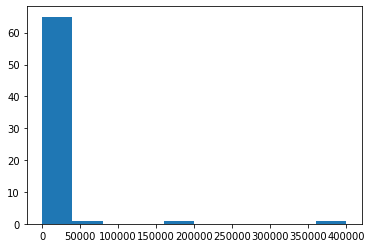

In [ ]:
plt.hist(Saiyan_Saga.Power_Level, bins=10)
plt.show()